# Assignment 1: PyTorch Basics

## Overview

In this assignment, you will:
1. Build a simple neural network from scratch to understand how neural networks work.
2. Train a neural network (using PyTorch) to classify images from the Mechanical Tools Classification dataset into one of 8 classes (hammer, wrench, pliers, etc.).

The provided code will guide you through key steps, but by the end of the assignment, you should:

1. Understand the training loop for a machine learning model.
2. Distinguish between training, validation, and test data.
3. Learn about overfitting and underfitting.
4. Explore how hyperparameters, like learning rate and batch size, impact training.
5. Compare a basic feedforward neural network (ANN) with a convolutional neural network (CNN).

This assignment is inspired by materials developed by Prof. Lisa Zhang.


## What to Submit

1. Submit the `.ipynb` and `.html` files containing your code, outputs, and answers from all parts. Please take extra effort to make your answers and submissions readable. Do not display unnecessary outputs, only the ones that are important for supporting your answers.

  You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.


2. Submit your model predictions on the secret test dataset for Parts B-5 and B-6 as `labels_part5.csv` and `labels_part6.csv`.

**Important**: Do not submit additional files generated by your code.

Please use Google Colab for this assignment. If you prefer Jupyter Notebook, ensure the file is uploaded to Colab for submission.


## Colab Link

Include a link to your colab file here and ensure the file can be accessed by the our teaching team.

Colab Link:

In [ ]:
# TO BE COMPLETED

# https://colab.research.google.com/drive/1b1MY965_PO3g3OEY3CNj-HhVQYOe6xxv?usp=sharing

# PART A: Building a Neural Network from Scratch [8pt]

Before we get into using PyTorch to train our classifier we will go through the process of creating our neural network from scratch. We've seen in the tutorial how to build a 1-layer network, now we'll take it one step further to build a 2-layer network. This is an important exercise that everyone should attempt at least once to understand and truly appreciate the workings of neural networks.

## Helper Functions

To help guide the construction we will use the iris dataset that was introduced in the tutorial. Provided are some helper code to get us started:


In [1]:
# load "Iris_3class.csv" to Google Colab
from google.colab import files
uploaded = files.upload()

Saving Iris_3class.csv to Iris_3class.csv


In [2]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data = raw_data.values
np.random.shuffle(raw_data)

In [3]:
import numpy as np

# split your data into training and validation
X_train = raw_data[0:100,:4]
y_train = raw_data[0:100,4:5].astype(int)
X_val = raw_data[100:,:4]
y_val = raw_data[100:,4:5].astype(int)

print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 1)
float64 int64
(50, 4) (50, 1)
float64 int64


Recall that the neural network output consists of several nodes, one for each output class. Since the labels are provided as integers we will need to convert them into one-hot vectors to match the neural network output format.

In [4]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [5]:
y_train = to_one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

y_val = to_one_hot(y_val)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 3)
float64 float64
(50, 4) (50, 3)
float64 float64


In [6]:
#verify one-hot encoding
y_train[0:5,:]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## Part A-1. Develop a 2-layer ANN [6pt MODEL]
At its core a 2-layer neural network is just a few lines of code. Most of the complexity comes from setting up the training of the network.

Using vectorized form, set up the neural network training to use a cross-entropy loss function and determine the gradients with resepect to the layer 1 and layer 2 weights.

In [7]:
# write code to create a 2-layer ANN in vectorized form

#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

#define softmax
def softmax(x):
  e = np.exp(x)
  return e/e.sum(axis=1, keepdims = True)


def ann(W, X_train, y_train):

  num_hidden = 5
  num_features = 4
  num_outputs = 3

  #Weights
  w0 = W[:20].reshape(num_features, num_hidden)
  w1 = W[20:].reshape(num_hidden, num_outputs)

  #Feed forward
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = np.dot(layer1, w1)

  # softmax
  y_pred = softmax(layer2)

  #Back propagation using gradient descent

  #cross-entropy loss
  N = X_train.shape[0] # number of training samples
  eps = 1e-12 # to avoid log(0) = - infinity
  error = -np.sum(y_train * np.log(y_pred + eps)) / N # TO BE COMPLETED

  #initialize gradients to zero
  dw0 = np.zeros((num_features, num_hidden))# TO BE COMPLETED
  dw1 = np.zeros((num_hidden, num_outputs))# TO BE COMPLETED

  #calculate gradients
  delta2 = (y_pred - y_train) / N # Gradient at the output: gradient of the CE loss (L) wrt. the logits of the output layer (z2)
  delta1 = (delta2 @ w1.T) * (layer1 * (1 - layer1)) # Gradient wrt. hidden layer (dL/dz1)
  # TO BE COMPLETED

  #determine gradients
  dw1 += layer1.T @ delta2# TO BE COMPLETED
  dw0 += layer0.T @ delta1# TO BE COMPLETED

  #combine gradients into one vector
  dW = np.array(list(dw0.flatten()) + list(dw1.flatten()))# TO BE COMPLETED

  return (error, dW, y_pred)


## Part A-2. Train your neural network [1pt RESULT]
Train your neural network once with random initialization (uniformly at random between -1 and +1), and once with zero initialization (all weights = 0).

Compare results. Comment on how well does your network work on the iris dataset in these two cases and why?

In [8]:
num_hidden = 5
num_features = 4
num_outputs = 3


def train_and_evaluate(w0_init, w1_init, label=""):

    #initial weights: w0_init, w1_init

    #combine weights into a single vector
    W = np.array(list(w0_init.flatten()) + list(w1_init.flatten()))

    #train network
    n = 0.001
    iterations = 100000
    errors = []
    for i in range(iterations):
        (error, dW, y_pred) = ann(W, X_train, y_train)
        W += -dW * n
        errors.append(error)

    # final predictions
    _, _, y_pred = ann(W, X_train, y_train)
    y_pred_labels = np.round(y_pred, 0)
    y_true_labels = np.round(y_train, 0)

    print(f"{label} initialization: Predictions on training data: \n{y_pred_labels[:5]}")
    print(f"{label} initialization: Ground truth training data: \n{y_true_labels[:5]}")

    accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_train, axis=1))
    print(f"{label} initialization: Final training accuracy: {accuracy:.4f}")

    return errors, accuracy

In [9]:
#random initialization
w0_rand = 2*np.random.random((4, 5)) - 1# TO BE COMPLETED
w1_rand = 2*np.random.random((5, 3)) - 1# TO BE COMPLETED
errors_rand, accuracy_rand = train_and_evaluate(w0_rand, w1_rand, "Random")

Random initialization: Predictions on training data: 
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
Random initialization: Ground truth training data: 
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
Random initialization: Final training accuracy: 0.9700


In [10]:
#zero initialization
w0_zero = np.zeros((4, 5))# TO BE COMPLETED
w1_zero = np.zeros((5, 3))# TO BE COMPLETED
errors_zero, acc_zero = train_and_evaluate(w0_zero, w1_zero, "Zero")

Zero initialization: Predictions on training data: 
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 1.]]
Zero initialization: Ground truth training data: 
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
Zero initialization: Final training accuracy: 0.3700


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

The random initialization has ~97% accuracy and the zero initialization has ~37%
accuracy. Because for random one, with small random weights, every hidden unit
starts a little different, so back-prop sends them different gradients. The
network breaks symmetry, learns useful features, and very quickly fits the Iris data.
However, for zero initialization, starting all weights at 0 makes every hidden
unit identical. They produce the same output and receive the same gradients, so
they stay identical. The model can’t carve up the space—effectively it collapses
to a very limited linear classifier and barely improves over chance.


'''

## Part A-3. Validation [2pt MODEL]
Validate that the gradients were computed correctly for the 2-layer neural network you developed.

In [11]:
#write code to numerical verify the gradients you calculated

num_hidden = 5
num_features = 4
num_outputs = 3

#initialize weights uniformly at random between -1 and +1, and combine weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1# TO BE COMPLETED
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1# TO BE COMPLETED
W = np.array(list(w0.flatten()) + list(w1.flatten()))# TO BE COMPLETED

#compute gradients analytically
(error, dW, y_pred) = ann(W, X_train, y_train)

#compute gradients numerically
dW_num = np.zeros((len(W),1))

for ind in range(len(W)):
  #reset gradients
  We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
  We2 = np.array(list(w0.flatten()) + list(w1.flatten()))

  #increment slightly
  We1[ind] = We1[ind] + 0.000001# TO BE COMPLETED
  We2[ind] = We2[ind] - 0.000001# TO BE COMPLETED

  #compute errors
  (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
  (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)

  #obtain numerical gradients
  grad_num = (error_e1-error_e2)/0.000002# TO BE COMPLETED

  #display difference between numerical and analytic gradients
  print(round(abs(grad_num - dW[ind]), 4), grad_num, dW[ind])


0.0 -0.0005185806228880097 -0.000518580522326604
0.0 0.006946037633959179 0.006946037636677625
0.0 -0.13107172669446499 -0.13107172671645997
0.0 -0.13176236723921875 -0.13176236732185312
0.0 0.315074742185395 0.31507474223193793
0.0 -0.00016912327094331658 -0.00016912325012785674
0.0 0.0024145188071145185 0.002414518853257263
0.0 -0.05497697264100765 -0.054976972787509876
0.0 -0.054483259792625915 -0.05448325989170727
0.0 0.14071880827248862 0.14071880825913155
0.0 -0.0005036330241736664 -0.0005036331340516688
0.0 0.007248321054476037 0.007248321086448844
0.0 -0.13878332927319548 -0.13878332930932716
0.0 -0.09891949681595236 -0.09891949669955635
0.0 0.22242278907569357 0.222422788934541
0.0 -0.00017026613452486572 -0.00017026631064332945
0.0 0.002628725459530301 0.002628725632760898
0.0 -0.05645419920430328 -0.05645419914568565
0.0 -0.029874366869186986 -0.029874366926561854
0.0 0.06551506126495354 0.06551506131260837
0.0 0.34181433994362465 0.3418143400624658
0.0 -0.189757689339487 -0

# PART B: Training with PyTorch

In the second part of the assignment we will see how we can use PyTorch to train a neural network to identify different Mechanical Tools.


In [12]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

## Part B-0. Helper Functions

We will be making use of the following helper functions. You will be asked to look
at and possibly modify some of these, but you are not expected to understand all of them.

You should look at the function names and read the docstrings. If you are curious, come back and explore the code *after* making some progress on the lab.

In [13]:
###############################################################################
# Data Loading

def get_data_loader(data_dir, batch_size, valid_split=0.2):
    """
    Load the Mechanical Tools Dataset, split into training, validation, and testing.

    Args:
        data_dir: The root directory of the dataset, with subdirectories for each class.
        batch_size: Number of samples per batch.
        valid_split: Fraction of the training data to be used for validation.

    Returns:
        train_loader: Iterable DataLoader for training data.
        val_loader: Iterable DataLoader for validation data.
        test_loader: Iterable DataLoader for testing data.
        classes: List of class names.
    """
    # Define transformations
    transform = transforms.Compose([
        transforms.Resize((128, 128)),  # Resize to 128x128
        transforms.ToTensor(),         # Convert to Tensor
        transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
    ])

    # Load the full dataset
    dataset = datasets.ImageFolder(data_dir, transform=transform)
    classes = dataset.classes  # Get class names

    # Split the dataset
    total_size = len(dataset)
    test_size = int(0.1 * total_size)  # 10% for testing
    valid_size = int(valid_split * (total_size - test_size))  # Valid from remaining
    train_size = total_size - test_size - valid_size

    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    return train_loader, val_loader, test_loader, classes

###############################################################################
# Training

def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Normalize labels for multi-class classification.

    Args:
        labels: A 1D tensor of scalar class labels.
    Returns:
        The same labels (already suitable for multi-class classification).
    """
    return labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on a given dataset.

     Args:
         net: PyTorch neural network object.
         loader: PyTorch DataLoader for valuation data.
         criterion: The loss function.

     Returns:
         err: Average classification error rate over the validation set.
         loss: Average loss value over the validation set.
    """
    total_loss = 0.0
    total_err = 0.0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in loader:
            outputs = net(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            # Compute classification error
            _, predicted = torch.max(outputs, 1)
            total_err += (predicted != labels).sum().item()
            total_loss += loss.item()
            total_samples += len(labels)

    err = total_err / total_samples
    avg_loss = total_loss / len(loader)
    return err, avg_loss

###############################################################################
# Training Curve

def plot_training_curve(path, return_val_error=False):
    """ Plot training and validation error/loss curves.

    Args:
        path: Base path for the CSV files containing training logs.
        return_val_error: If True, return the final validation error.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    train_err = np.loadtxt(f"{path}_train_err.csv")
    val_err = np.loadtxt(f"{path}_val_err.csv")
    train_loss = np.loadtxt(f"{path}_train_loss.csv")
    val_loss = np.loadtxt(f"{path}_val_loss.csv")

    if return_val_error:
        return val_err[-1]  # Return the final validation error

    plt.figure()
    plt.title("Train vs Validation Error")
    plt.plot(range(1, len(train_err) + 1), train_err, label="Train")
    plt.plot(range(1, len(val_err) + 1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()

    plt.figure()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1, len(train_loss) + 1), train_loss, label="Train")
    plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()



## Part B-1. Visualizing the Data

We will make use of the Mechanical Tools dataset, which consists of
color images of various mechanical tools such as hammers, wrenches,
screwdrivers, and more. These images are resized to 128x128 pixels.
You can find the dataset at https://www.kaggle.com/datasets/salmaneunus/mechanical-tools-dataset

Download the "mechanical_tools.zip" file from Quercus and upload it to your colab session storage.
Run the provided code to automatically unzip the dataset  and split the dataset into
training, validation, and testing sets.

In [14]:
_ = !unzip "/content/mechanical_tools.zip" -d "/content/mechanical_tools/"

In [15]:
# Load the Mechanical Tools Dataset
data_dir = "./mechanical_tools/mechanical_tools"  # Path to the dataset directory
batch_size = 1  # One image per batch for visualization

# Use the get_data_loader function to load the dataset
train_loader, val_loader, test_loader, classes = get_data_loader(
    data_dir=data_dir, batch_size=batch_size
)

### Part B-1(i) [0.5pt EXPLORATORY]

Below is some sample plotting code that visualizes a small batch of images from your training set. Currently, it plots 15 images in a 3 × 5 grid.


Modify the code so that it instead plots 30 images in a 3 × 10 grid, and displays the ground-truth label above each subplot.
You may use the provided code as a starting point.

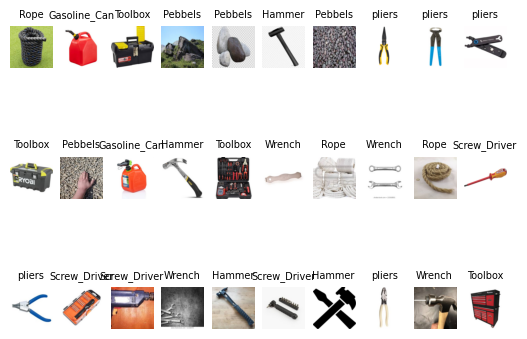

In [16]:
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 10, k+1)
    plt.axis('off')
    plt.imshow(img)

    plt.title(train_loader.dataset.dataset.classes[labels.item()], fontsize=7)



    k += 1
    if k > 29:
        break

### Part B-1(ii) [1pt EXPLORATORY]

How many training examples do we have for the combined classes?
What about validation examples?
What about test examples?

Plot the distribution of class labels in training/validation/test. Comment on whether the dataset is balanced or imbalanced.

Number of training examples: 1152
Number of validation examples: 288
Number of test examples: 160


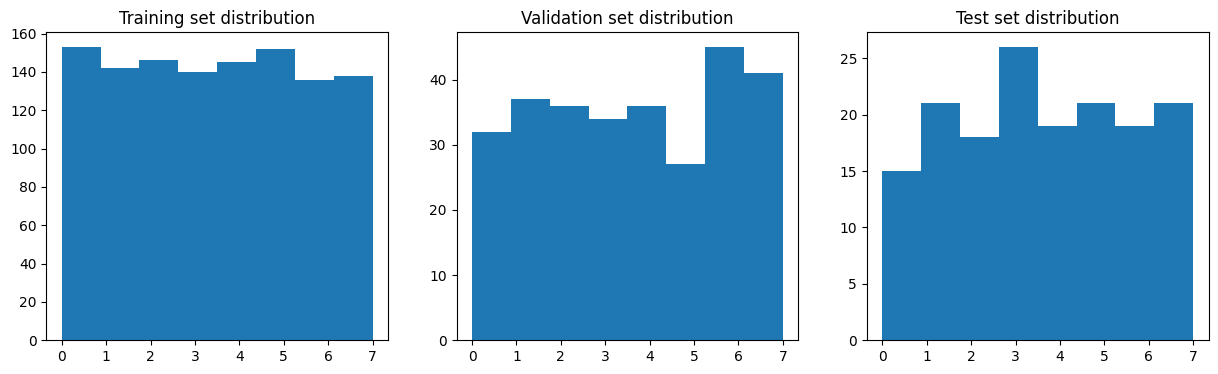

In [17]:
# TO BE COMPLETED
import matplotlib.pyplot as plt
import torch

# Datasets from your dataloaders
train_dataset = train_loader.dataset
val_dataset   = val_loader.dataset
test_dataset  = test_loader.dataset

print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(val_dataset))
print("Number of test examples:", len(test_dataset))

# Function to count labels
def count_labels(dataset):
    labels = []
    for _, lab in dataset:
        if isinstance(lab, torch.Tensor):
            labels.append(lab.item())
        else:
            labels.append(lab)
    return labels

train_labels = count_labels(train_dataset)
val_labels   = count_labels(val_dataset)
test_labels  = count_labels(test_dataset)

# Plot distributions
fig, axs = plt.subplots(1, 3, figsize=(15,4))
axs[0].hist(train_labels, bins=len(set(train_labels)))
axs[0].set_title("Training set distribution")
axs[1].hist(val_labels, bins=len(set(val_labels)))
axs[1].set_title("Validation set distribution")
axs[2].hist(test_labels, bins=len(set(test_labels)))
axs[2].set_title("Test set distribution")

plt.show()







In [18]:
'''
PROVIDE YOUR ANSWER BELOW
We have 1152 number of training examples, 288 number of validation examples,
 and 160 number of test examples.

The training set seems balanced, but test and validation sets contain more
numbers for some labels, which indicates imbalance.


'''

'\nPROVIDE YOUR ANSWER BELOW\nWe have 1152 number of training examples, 288 number of validation examples,\n and 160 number of test examples.\n\nThe training and validation set seems balanced, but test set contains much more\n number of label 5 and 6 than other labels which indicates imbalance.\n\n\n'

## Part B-2. Training

We define two neural networks, a `LargeNet` and `SmallNet`.
We'll be training the networks in this section.

You won't understand fully what these networks are doing until
the next few classes, and that's okay. For this assignment, please
focus on learning how to train networks, and how hyperparameters affect
training.

In [19]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 29 * 29, 32)
        self.fc2 = nn.Linear(32, 8)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 29 * 29)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [21]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 31 * 31, 8)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 31 * 31)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [22]:
small_net = SmallNet()
large_net = LargeNet()

### Part B-2(i) [1pt EXPLORATORY]

The methods `small_net.parameters()` and `large_net.parameters()`
produces an iterator of all the trainable parameters of the network.
These parameters are torch tensors containing many scalar values.

We haven't learned how how the parameters in these high-dimensional
tensors will be used, but we should be able to count the number
of parameters. Measuring the number of parameters in a network is
one way of measuring the "size" of a network.

What is the total number of parameters in `small_net` and in
`large_net`? (Hint: how many numbers are in each tensor?)

In [23]:
for param in small_net.parameters():
    print(param.shape)

torch.Size([5, 3, 3, 3])
torch.Size([5])
torch.Size([8, 4805])
torch.Size([8])


In [24]:
# TO BE COMPLETED

total_params_small = sum(p.numel() for p in small_net.parameters())
print("Total parameters in small_net:", total_params_small)

total_params_large = sum(p.numel() for p in large_net.parameters())
print("Total parameters in large_net:", total_params_large)

Total parameters in small_net: 38588
Total parameters in large_net: 271056


In [25]:
'''
PROVIDE YOUR ANSWER BELOW

There are 38588 number of parameters in the small net, and 271056 parameters in the large net.

Large net with more layers has more parameters.



'''

'\nPROVIDE YOUR ANSWER BELOW\n\nThere are 38588 number of parameters in the small net, and 271056 parameters in the large net.\n\nLarge net with more layers has more parameters.\n\n\n\n'

### The function train_net

The function `train_net` below takes an untrained neural network (like `small_net` and `large_net`) and
several other parameters. You should be able to understand how this function works.
The figure below shows the high level training loop for a machine learning model:

![alt text](https://github.com/UTNeural/Lab2/blob/master/Diagram.png?raw=true)

In [26]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on an 8-class classification problem
    target_classes = ["Gasoline_Can", "Hammer", "Pebbels", "pliers",
                      "Rope", "Screw_Driver", "Toolbox", "Wrench"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible results
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            data_dir='/content/mechanical_tools/mechanical_tools',  # Ensure this is where your dataset is stored
            batch_size=batch_size)

    # Make sure the classes are as expected
    assert len(classes) == 8, "The dataset should have exactly 8 classes."
    ########################################################################
    # Define the Loss function and optimizer
    # Use CrossEntropyLoss for multi-class classification
    criterion = nn.CrossEntropyLoss()  # Change to CrossEntropyLoss for multi-class
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/accuracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # Loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)  # No need to normalize labels here for CrossEntropyLoss
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
            total_train_err += (predicted != labels).sum().item()  # Count errors
            total_train_loss += loss.item()
            total_epoch += len(labels)

        # Calculate error and loss for the training and validation set
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i + 1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)

        # Print stats for the current epoch
        print(f"Epoch {epoch + 1}: Train err: {train_err[epoch]:.4f}, Train loss: {train_loss[epoch]:.4f} | "
              f"Validation err: {val_err[epoch]:.4f}, Validation loss: {val_loss[epoch]:.4f}")

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Total time elapsed: {elapsed_time:.2f} seconds")

    # Write the train/test loss/error into CSV files for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt(f"{model_path}_train_err.csv", train_err)
    np.savetxt(f"{model_path}_train_loss.csv", train_loss)
    np.savetxt(f"{model_path}_val_err.csv", val_err)
    np.savetxt(f"{model_path}_val_loss.csv", val_loss)


### Part B-2(ii) [0.5pt EXPLORATORY]

The parameters to the function `train_net` are hyperparameters of our neural network.
We made these hyperparameters easy to modify so that we can tune them later on.

What are the default values of the parameters `batch_size`, `learning_rate`,
and `num_epochs`?

In [27]:
'''
PROVIDE YOUR ANSWER BELOW

The default values of batch_size, learning_rate, and num_epochs are 64, 0.01, and 30.




'''

'\nPROVIDE YOUR ANSWER BELOW\n\nThe default values of batch_size, learning_rate, and num_epochs are 64, 0.01, and 30.\n\n\n\n\n'

### Part B-2(iii) [0.5pt EXPLORATORY]
What files are written to disk when we call `train_net` with `small_net`, and train for 5 epochs? Provide a list
of all the files written to disk, and what information the files contain.

In [28]:
'''
PROVIDE YOUR ANSWER BELOW

1. Per-epoch model checkpoints (5 files)

Each of them contains stat_dict (a dictionary mapping each layer name) of the model.
For small net, this includes hidden layer weights with shape [5, 3, 3, 3], hidden biases with shape [5],
fully connected layer weights with shape [8, 4805], and fully connected biases with shape [8].


2. Training history csv files (4 files)

Each of them contains training error, training loss, validation error, and validation loss per epoch.
Each is a column of 5 numbers (num_epochs=5), in epoch order.

'''

'\nPROVIDE YOUR ANSWER BELOW\n\n1. Per-epoch model checkpoints (5 files)\n\nEach of them contains stat_dict (a dictionary mapping each layer name) of the model.\nFor small net, this includes hidden layer weights with shape [5, 3, 3, 3], hidden biases with shape [5],\nfully connected layer weights with shape [8, 4805], and fully connected biases with shape [8].\n\n\n2. Training history csv files (4 files)\n\nEach of them contains training error, training loss, validation error, and validation loss per epoch.\nEach is a column of 5 numbers (num_epochs=5), in epoch order.\n\n'

### Part B-2(iv) [0.5pt EXPLORATORY]
Train both `small_net` and `large_net` using the function `train_net` and its default parameters.
The function will write many files to disk, including a model checkpoint (saved values of model weights)
at the end of each epoch.

If you are using Google Colab, you will need to mount Google Drive
so that the files generated by `train_net` gets saved. We will be using
these files in the parts that follow.
(See the Google Colab tutorial for more information about this.)

Report the total time elapsed when training each network. Which network took longer to train?
Why?

In [29]:
# Since the function writes files to disk, you will need to mount
# your Google Drive. If you are working on the assignment locally, you
# can comment out this code.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [30]:
# TO BE COMPLETED

print("\n=== Training small_net ===")
train_net(small_net)

print("\n=== Training large_net ===")
train_net(large_net)



=== Training small_net ===
Epoch 1: Train err: 0.7005, Train loss: 1.8476 | Validation err: 0.6667, Validation loss: 1.7245
Epoch 2: Train err: 0.5495, Train loss: 1.4869 | Validation err: 0.6007, Validation loss: 1.6109
Epoch 3: Train err: 0.4470, Train loss: 1.3289 | Validation err: 0.5278, Validation loss: 1.4739
Epoch 4: Train err: 0.3906, Train loss: 1.1196 | Validation err: 0.4965, Validation loss: 1.4734
Epoch 5: Train err: 0.3238, Train loss: 0.9436 | Validation err: 0.4965, Validation loss: 1.6076
Epoch 6: Train err: 0.2613, Train loss: 0.8335 | Validation err: 0.5590, Validation loss: 1.7729
Epoch 7: Train err: 0.2057, Train loss: 0.6715 | Validation err: 0.5417, Validation loss: 1.7873
Epoch 8: Train err: 0.1476, Train loss: 0.5420 | Validation err: 0.5174, Validation loss: 1.9176
Epoch 9: Train err: 0.1120, Train loss: 0.4213 | Validation err: 0.5625, Validation loss: 2.1075
Epoch 10: Train err: 0.0720, Train loss: 0.3155 | Validation err: 0.5000, Validation loss: 2.0768
E

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Total time elapsed for small net is 160.05 seconds, and for large net is 246.02 seconds.

The large net took longer to run because it has far more parameters and layers,
so each forward/backward pass does many more operations.




'''

### Part B-2(v) [0.5pt EXPLORATORY]
Use the function `plot_training_curve` to display the trajectory of the
training/validation error and the training/validation loss.
You will need to use the function `get_model_name` to generate the
argument to the `plot_training_curve` function.

Do this for both the small network and the large network. Include both plots
in your writeup.

In [31]:
#model_path = get_model_name("small", batch_size=??, learning_rate=??, epoch=29)

=== Training curves for SmallNet ===


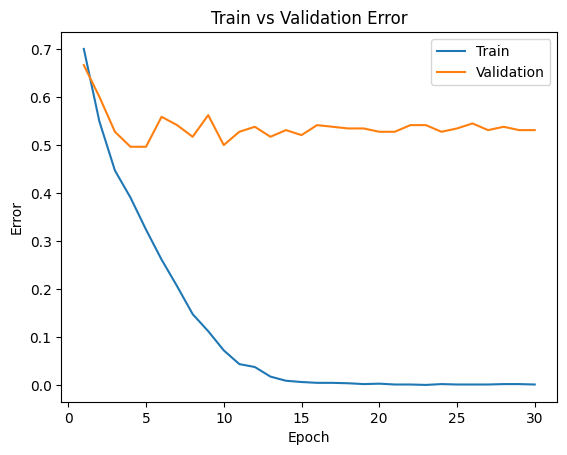

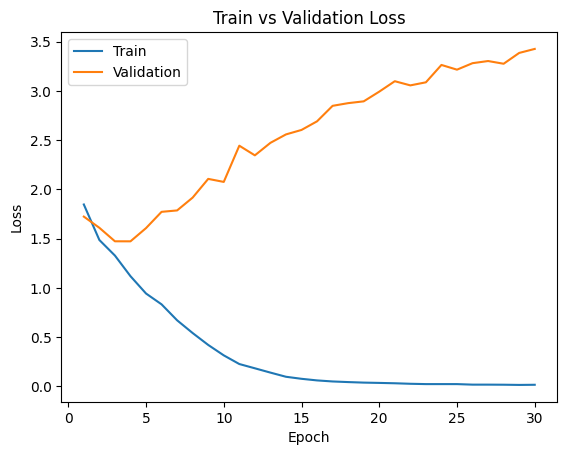

=== Training curves for LargeNet ===


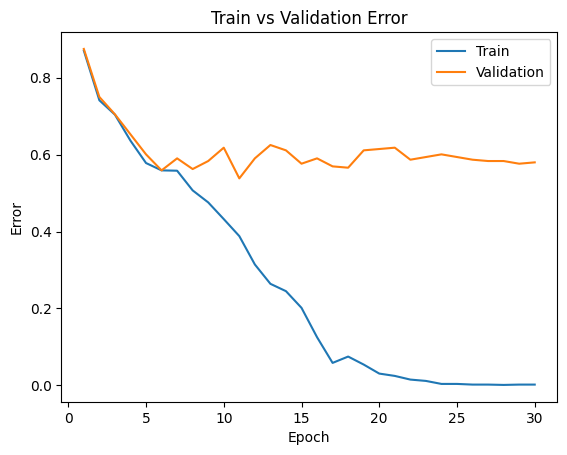

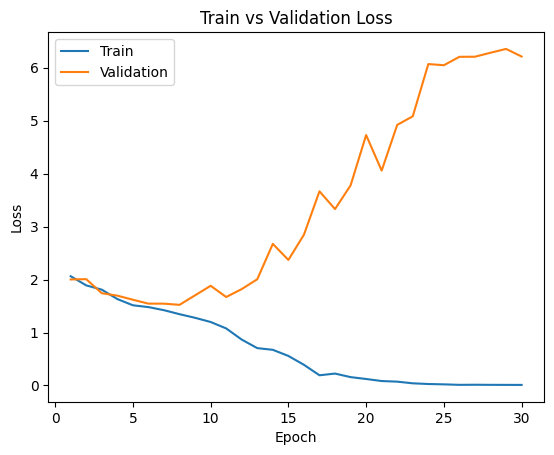

In [32]:
# TO BE COMPLETED

# Plot training/validation curves for small_net
model_path_small = get_model_name("small", batch_size=64, learning_rate=0.01, epoch=29)
print("=== Training curves for SmallNet ===")
plot_training_curve(model_path_small)

# Plot training/validation curves for large_net
model_path_large = get_model_name("large", batch_size=64, learning_rate=0.01, epoch=29)
print("=== Training curves for LargeNet ===")
plot_training_curve(model_path_large)


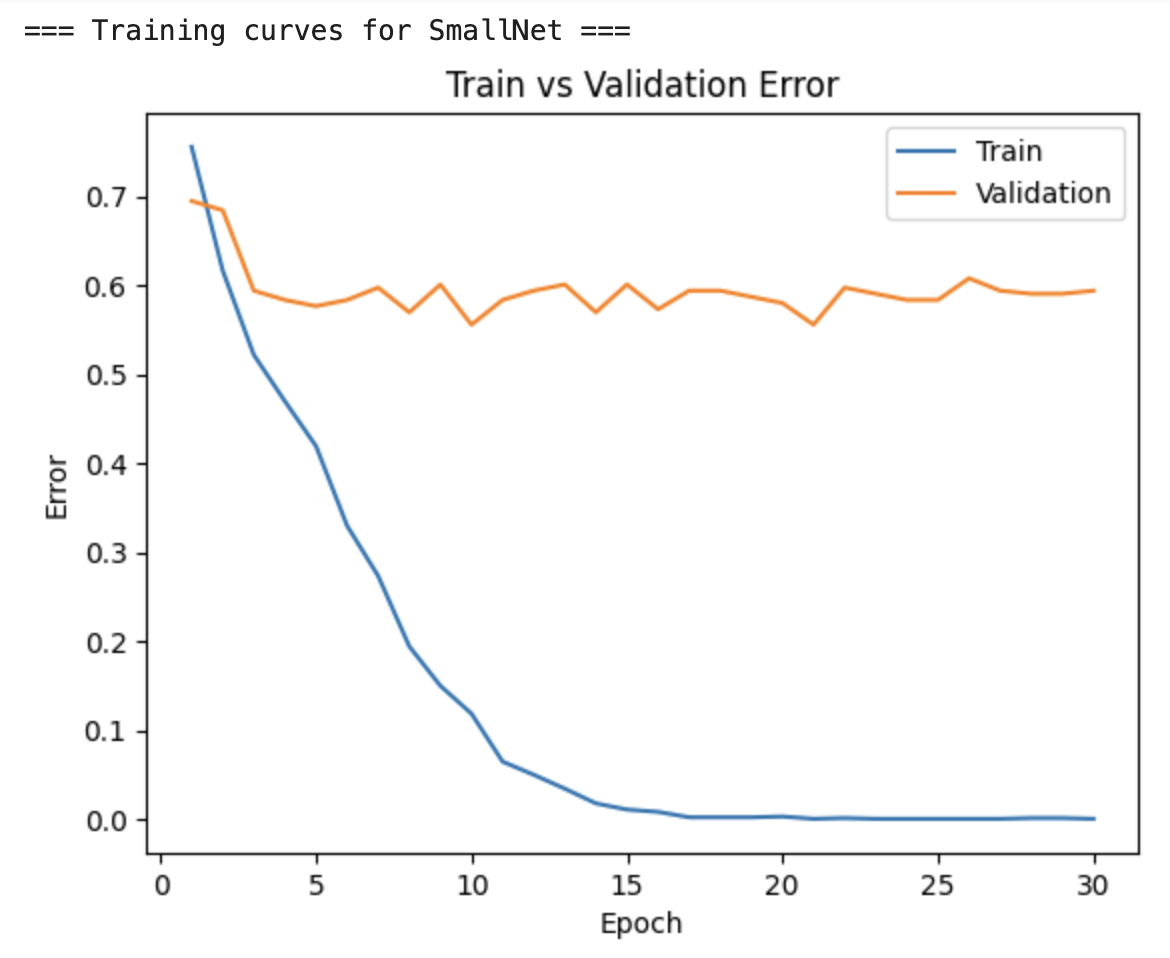


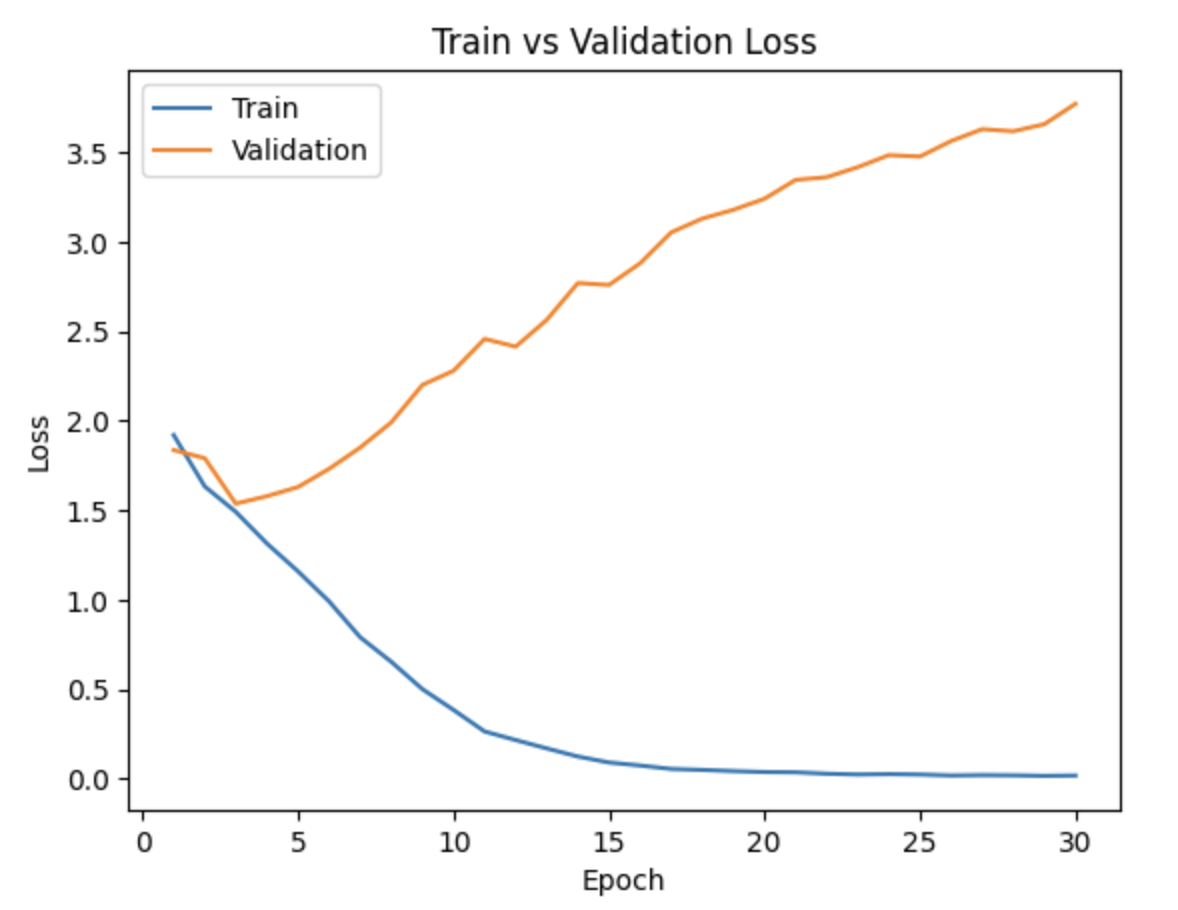

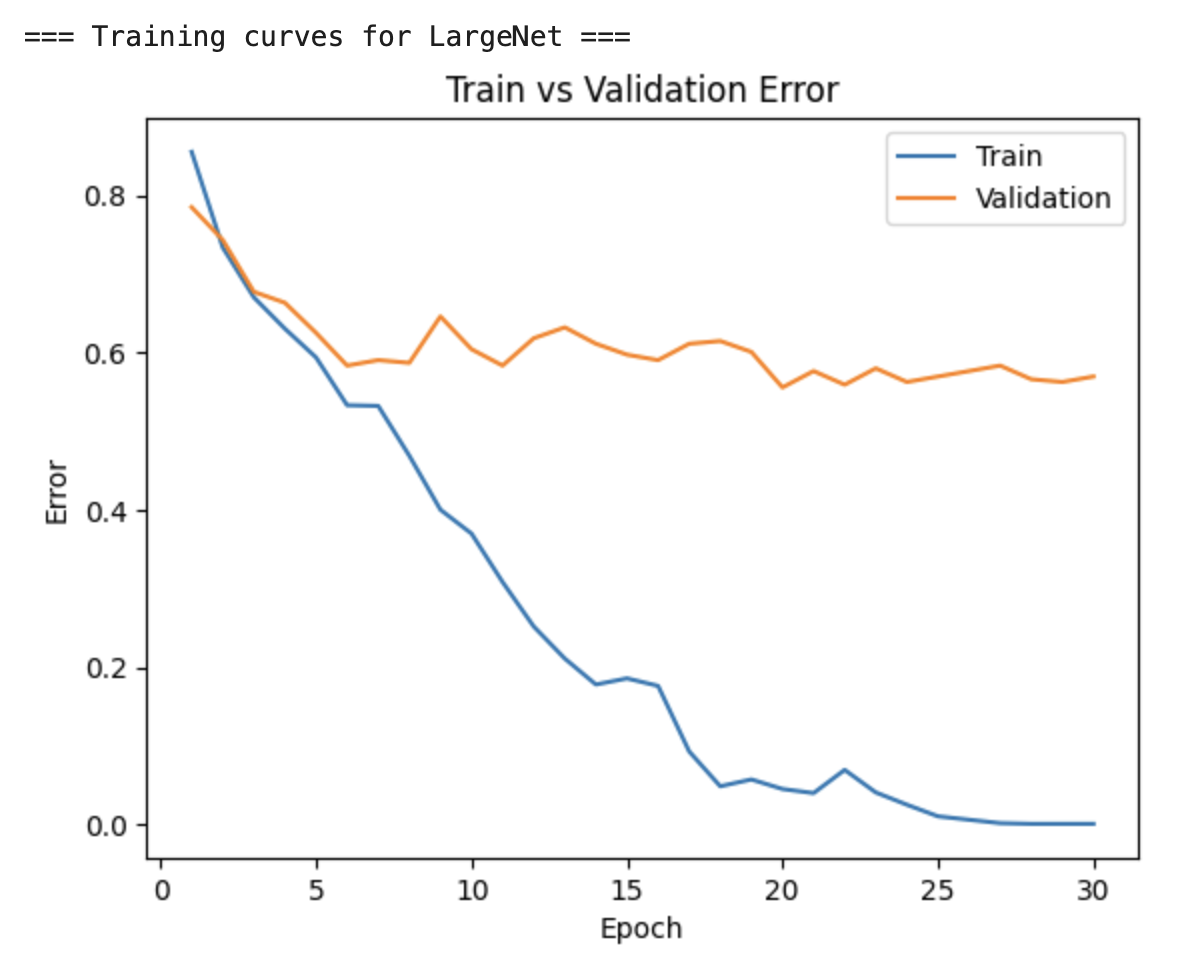

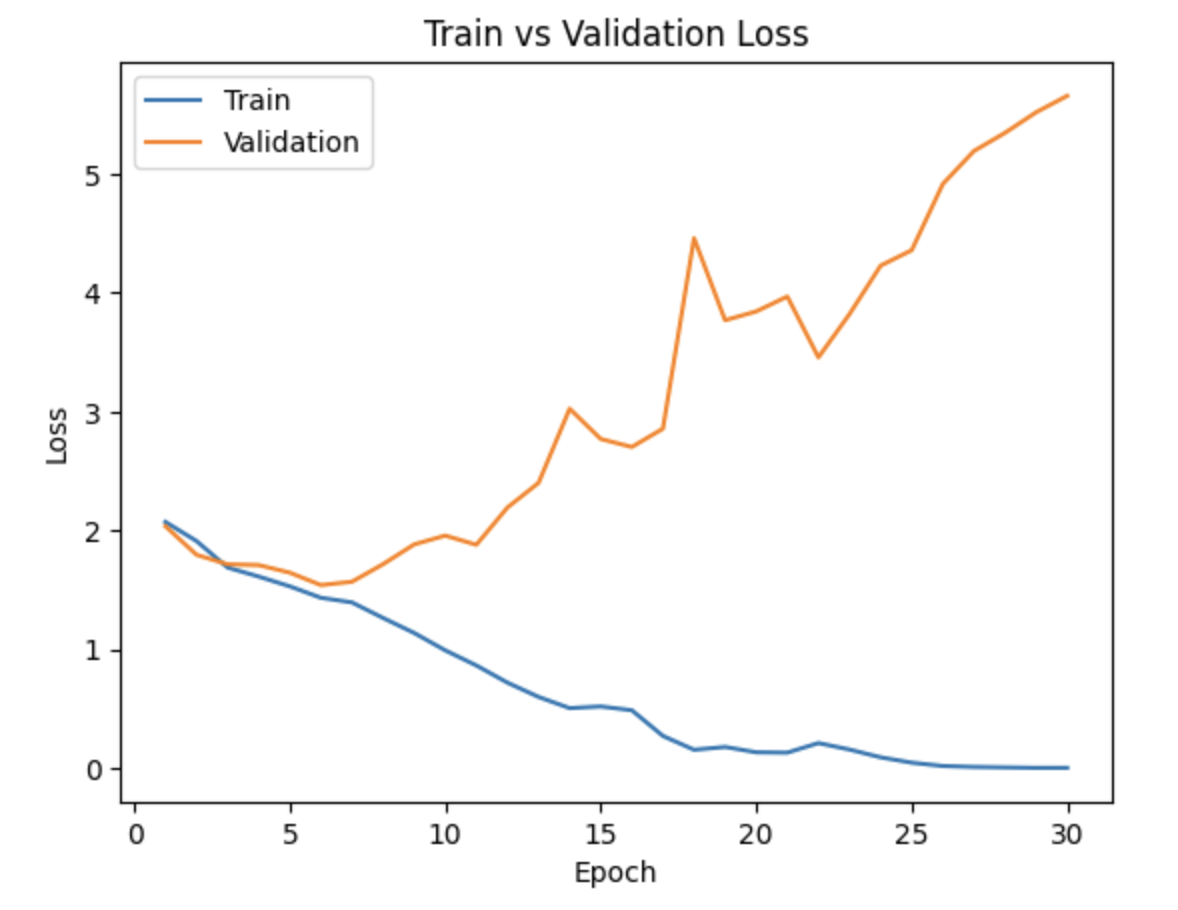

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Images are pasted above


'''

### Part B-2(vi) [0.5pt EXPLORATORY]
Describe what you notice about the training curve.
How do the curves differ for `small_net` and `large_net`?
Identify any occurences of underfitting and overfitting.

In [33]:
'''
PROVIDE YOUR ANSWER BELOW

For both small_net and large_net, the training error and loss drop close to zero
as the models keep learning. On the other hand, the validation error stays much
higher (around 0.55–0.60), and the validation loss only goes down a little at the
start before climbing steadily. This shows that the models fit the training set
very well but don’t generalize well to new data.

The main difference is that large_net starts overfitting earlier and more
severely — the validation loss climbs faster and ends up higher than in small_net.
That makes sense since large_net has many more parameters. Neither model is underfitting,
because both reach almost zero training error, but both clearly suffer from overfitting,
especially the larger network.


'''

'\nPROVIDE YOUR ANSWER BELOW\n\nFor both small_net and large_net, the training error and loss drop close to zero\nas the models keep learning. On the other hand, the validation error stays much\nhigher (around 0.55–0.60), and the validation loss only goes down a little at the\nstart before climbing steadily. This shows that the models fit the training set\nvery well but don’t generalize well to new data.\n\nThe main difference is that large_net starts overfitting earlier and more\nseverely — the validation loss climbs faster and ends up higher than in small_net.\nThat makes sense since large_net has many more parameters. Neither model is underfitting,\nbecause both reach almost zero training error, but both clearly suffer from overfitting,\nespecially the larger network.\n\n\n'

## Part B-3. Optimization Parameters

For this section, we will work with `large_net` only.

### Part B-3(i) [0.5pt EXPLORATORY]
Train `large_net` with all default parameters, except set `learning_rate=0.001`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *lowering* the learning rate.

In [34]:
# Note: When we re-construct the model, we start the training
# with *random weights*. If we omit this code, the values of
# the weights will still be the previously trained values.
large_net = LargeNet()

Epoch 1: Train err: 0.8663, Train loss: 2.0815 | Validation err: 0.8854, Validation loss: 2.0806
Epoch 2: Train err: 0.8646, Train loss: 2.0734 | Validation err: 0.8889, Validation loss: 2.0713
Epoch 3: Train err: 0.8585, Train loss: 2.0622 | Validation err: 0.8854, Validation loss: 2.0555
Epoch 4: Train err: 0.8542, Train loss: 2.0413 | Validation err: 0.8507, Validation loss: 2.0273
Epoch 5: Train err: 0.8351, Train loss: 2.0078 | Validation err: 0.8090, Validation loss: 1.9891
Epoch 6: Train err: 0.7899, Train loss: 1.9661 | Validation err: 0.7882, Validation loss: 1.9590
Epoch 7: Train err: 0.7491, Train loss: 1.9278 | Validation err: 0.7535, Validation loss: 1.9330
Epoch 8: Train err: 0.7370, Train loss: 1.8897 | Validation err: 0.7188, Validation loss: 1.9137
Epoch 9: Train err: 0.6884, Train loss: 1.8414 | Validation err: 0.6944, Validation loss: 1.8703
Epoch 10: Train err: 0.6450, Train loss: 1.7746 | Validation err: 0.6910, Validation loss: 1.7967
Epoch 11: Train err: 0.6189, 

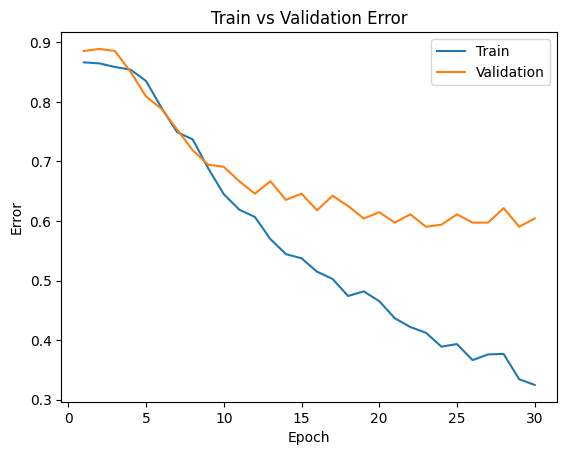

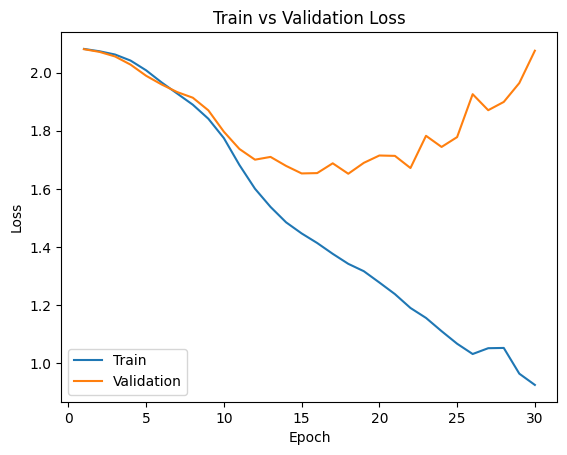

In [35]:
# TO BE COMPLETED

# Train large_net with a smaller learning rate
model_path = get_model_name("large", batch_size=64, learning_rate=0.001, epoch=29)
train_net(large_net, batch_size=64, learning_rate=0.001, num_epochs=30)

# Plot the training curve
plot_training_curve(model_path)


In [36]:
'''
PROVIDE YOUR ANSWER BELOW

When we lower the learning rate to 0.001, the network trains much more slowly.
The model adjusts weights in smaller steps, so convergence is slower.

It cost 246.02 seconds with learning rate = 0.01, and 251.69 seconds with learning rate = 0.001.

When training LargeNet with a learning rate of 0.01, the training error and loss
dropped quickly, but the validation curves started to rise after a few epochs.
This shows that the model was learning the training set too aggressively and ended up overfitting.

With the lower learning rate of 0.001, the training curves went down much more slowly.
The training error stayed higher compared to 0.01, but the validation curves followed
the training curves more closely. This suggests the model was fitting more gradually,
with less overfitting, although it would likely need more epochs to reach its best performance.


'''

'\nPROVIDE YOUR ANSWER BELOW\n\nWhen we lower the learning rate to 0.001, the network trains much more slowly.\nThe model adjusts weights in smaller steps, so convergence is slower.\n\nIt cost 246.02 seconds with learning rate = 0.01, and 251.69 seconds with learning rate = 0.001.\n\nWhen training LargeNet with a learning rate of 0.01, the training error and loss\ndropped quickly, but the validation curves started to rise after a few epochs.\nThis shows that the model was learning the training set too aggressively and ended up overfitting.\n\nWith the lower learning rate of 0.001, the training curves went down much more slowly.\nThe training error stayed higher compared to 0.01, but the validation curves followed\nthe training curves more closely. This suggests the model was fitting more gradually,\nwith less overfitting, although it would likely need more epochs to reach its best performance.\n\n\n'

### Part B-3(ii) [0.5pt EXPLORATORY]
Train `large_net` with all default parameters, except set `learning_rate=0.1`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the learning rate.

Epoch 1: Train err: 0.8333, Train loss: 2.0070 | Validation err: 0.8333, Validation loss: 2.0260
Epoch 2: Train err: 0.7778, Train loss: 2.4241 | Validation err: 0.8299, Validation loss: 3.3601
Epoch 3: Train err: 0.8715, Train loss: 2.1709 | Validation err: 0.8715, Validation loss: 2.0927
Epoch 4: Train err: 0.8950, Train loss: 2.0905 | Validation err: 0.8924, Validation loss: 2.0863
Epoch 5: Train err: 0.8776, Train loss: 2.0821 | Validation err: 0.8576, Validation loss: 2.0790
Epoch 6: Train err: 0.8845, Train loss: 2.0828 | Validation err: 0.8681, Validation loss: 2.0826
Epoch 7: Train err: 0.8802, Train loss: 2.0829 | Validation err: 0.8576, Validation loss: 2.0787
Epoch 8: Train err: 0.8733, Train loss: 2.0843 | Validation err: 0.8785, Validation loss: 2.0861
Epoch 9: Train err: 0.8906, Train loss: 2.0846 | Validation err: 0.8715, Validation loss: 2.0777
Epoch 10: Train err: 0.8828, Train loss: 2.0848 | Validation err: 0.8681, Validation loss: 2.0827
Epoch 11: Train err: 0.8785, 

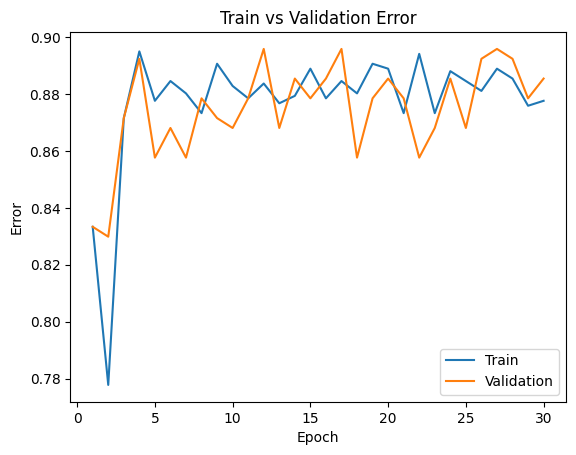

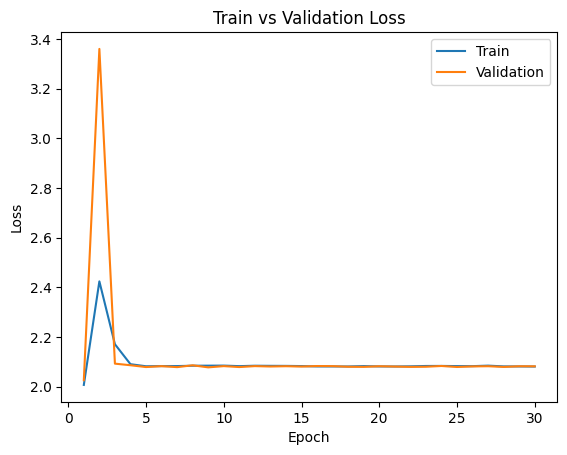

In [37]:
# TO BE COMPLETED

large_net = LargeNet()

# Train large_net with a larger learning rate
model_path = get_model_name("large", batch_size=64, learning_rate=0.1, epoch=29)
train_net(large_net, batch_size=64, learning_rate=0.1, num_epochs=30)

# Plot the training curve
plot_training_curve(model_path)



In [38]:
'''
PROVIDE YOUR ANSWER BELOW

It cost even more times than when the learning rate is 0.01.

The training is unstable. Both training and validation errors stayed high and
bounced around without clear improvement, and the losses quickly flattened out
near 2.0. This shows the step size was too large, so the updates overshot the
minimum instead of converging.


'''

'\nPROVIDE YOUR ANSWER BELOW\n\nIt cost even more times than when the learning rate is 0.01.\n\nThe training is unstable. Both training and validation errors stayed high and\nbounced around without clear improvement, and the losses quickly flattened out\nnear 2.0. This shows the step size was too large, so the updates overshot the\nminimum instead of converging.\n\n\n'

### Part B-3(iii) [0.5pt EXPLORATORY]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=512`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the batch size.

Epoch 1: Train err: 0.8594, Train loss: 2.0847 | Validation err: 0.8889, Validation loss: 2.0832
Epoch 2: Train err: 0.8655, Train loss: 2.0756 | Validation err: 0.8889, Validation loss: 2.0775
Epoch 3: Train err: 0.8533, Train loss: 2.0697 | Validation err: 0.8507, Validation loss: 2.0703
Epoch 4: Train err: 0.8307, Train loss: 2.0622 | Validation err: 0.8542, Validation loss: 2.0582
Epoch 5: Train err: 0.8273, Train loss: 2.0521 | Validation err: 0.8333, Validation loss: 2.0364
Epoch 6: Train err: 0.8194, Train loss: 2.0163 | Validation err: 0.8090, Validation loss: 2.0029
Epoch 7: Train err: 0.7969, Train loss: 1.9971 | Validation err: 0.7674, Validation loss: 1.9746
Epoch 8: Train err: 0.7682, Train loss: 1.9531 | Validation err: 0.7708, Validation loss: 1.9606
Epoch 9: Train err: 0.7613, Train loss: 1.9372 | Validation err: 0.7535, Validation loss: 1.9476
Epoch 10: Train err: 0.7214, Train loss: 1.8828 | Validation err: 0.7049, Validation loss: 1.9093
Epoch 11: Train err: 0.7040, 

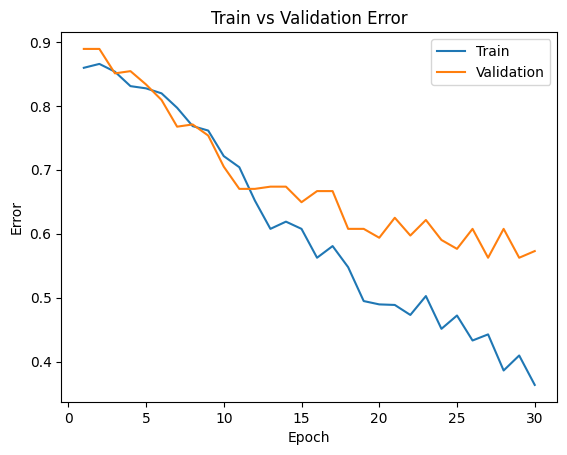

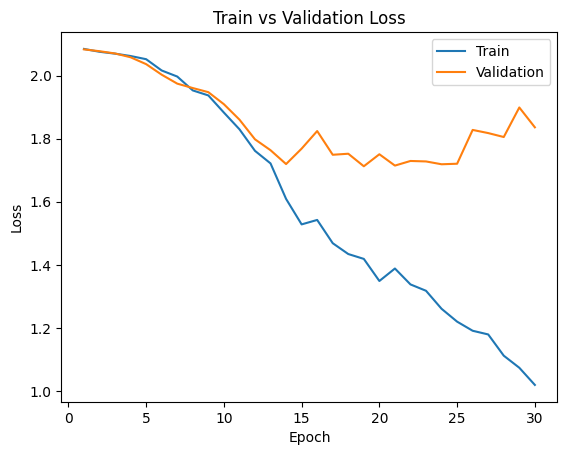

In [44]:
# TO BE COMPLETED

large_net = LargeNet()

# Train large_net with a larger batch size
model_path = get_model_name("large", batch_size=512, learning_rate=0.01, epoch=29)
train_net(large_net, batch_size=512, learning_rate=0.01, num_epochs=30)

# Plot the training curve
plot_training_curve(model_path)




In [45]:
'''
PROVIDE YOUR ANSWER BELOW

When I increased the batch size to 512, the training took longer and the error
curves dropped more slowly. The model didn’t reach as low a training or validation
error as it did with batch size 64. This suggests that larger batches made the
updates less frequent and the model learned less effectively. It also reduced the
amount of overfitting, but overall performance was worse.




'''

'\nPROVIDE YOUR ANSWER BELOW\n\nWhen I increased the batch size to 512, the training took longer and the error\ncurves dropped more slowly. The model didn’t reach as low a training or validation\nerror as it did with batch size 64. This suggests that larger batches made the\nupdates less frequent and the model learned less effectively. It also reduced the\namount of overfitting, but overall performance was worse.\n\n\n\n\n'

### Part B-3(iv) [0.5pt EXPLORATORY]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=16`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *decreasing* the batch size.

Epoch 1: Train err: 0.7977, Train loss: 1.9846 | Validation err: 0.7674, Validation loss: 1.8958
Epoch 2: Train err: 0.6589, Train loss: 1.7050 | Validation err: 0.7465, Validation loss: 1.8987
Epoch 3: Train err: 0.6250, Train loss: 1.6688 | Validation err: 0.8056, Validation loss: 1.9328
Epoch 4: Train err: 0.5972, Train loss: 1.5762 | Validation err: 0.7083, Validation loss: 1.8169
Epoch 5: Train err: 0.5347, Train loss: 1.4379 | Validation err: 0.6667, Validation loss: 1.8477
Epoch 6: Train err: 0.4774, Train loss: 1.3486 | Validation err: 0.7014, Validation loss: 1.8605
Epoch 7: Train err: 0.3785, Train loss: 1.0512 | Validation err: 0.6597, Validation loss: 1.9978
Epoch 8: Train err: 0.2405, Train loss: 0.7099 | Validation err: 0.5799, Validation loss: 2.4698
Epoch 9: Train err: 0.1780, Train loss: 0.5332 | Validation err: 0.6840, Validation loss: 3.5427
Epoch 10: Train err: 0.1667, Train loss: 0.5111 | Validation err: 0.6493, Validation loss: 3.7491
Epoch 11: Train err: 0.0938, 

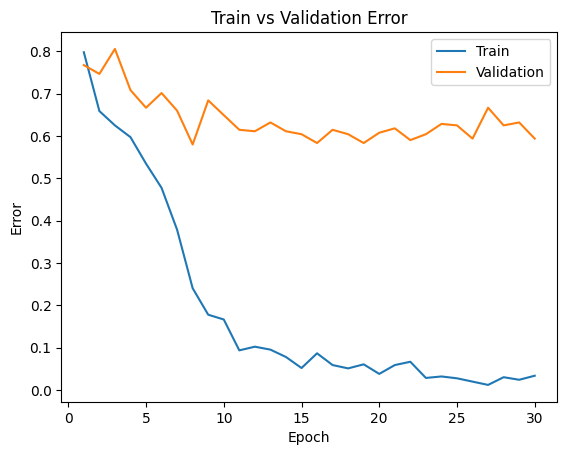

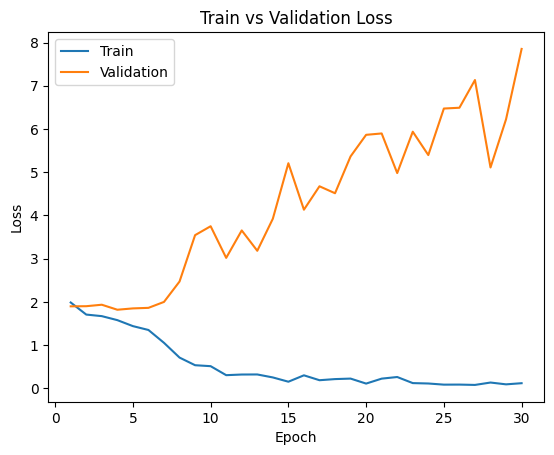

In [49]:
# TO BE COMPLETED

large_net = LargeNet()

# Train large_net with a smaller batch_size
model_path = get_model_name("large", batch_size=16, learning_rate=0.01, epoch=29)
train_net(large_net, batch_size=16, learning_rate=0.01, num_epochs=30)

# Plot the training curve
plot_training_curve(model_path)




In [50]:
'''
PROVIDE YOUR ANSWER BELOW

Training time (259.38) is a bit longer than bs=64 but shorter than bs=512.
Smaller batches mean more updates per epoch, so there’s extra overhead even if
each update is cheap.

The training error drops very quickly, almost to zero. However, the validation
error levels off around 0.6 and the validation loss increases steadily, which
shows strong overfitting. Compared to batch size 64, the gap between train and
validation curves is larger, meaning worse generalization. Compared to batch size
512, the model fits the training set much faster, but the validation performance
is poorer. In short, lowering the batch size made training more aggressive but
increased overfitting.



'''

'\nPROVIDE YOUR ANSWER BELOW\n\nTraining time (259.38) is a bit longer than bs=64 but shorter than bs=512.\nSmaller batches mean more updates per epoch, so there’s extra overhead even if\neach update is cheap.\n\nThe training error drops very quickly, almost to zero. However, the validation\nerror levels off around 0.6 and the validation loss increases steadily, which\nshows strong overfitting. Compared to batch size 64, the gap between train and\nvalidation curves is larger, meaning worse generalization. Compared to batch size\n512, the model fits the training set much faster, but the validation performance\nis poorer. In short, lowering the batch size made training more aggressive but\nincreased overfitting.\n\n\n\n'

## Part B-4. Hyperparameter Search

### Part B-4(i) [0.5pt EXPLORATORY]

Based on the plots from above, choose another set of values for the hyperparameters (network, batch_size, learning_rate)
that you think would help you improve the validation accuracy. Justify your choice.

In [51]:
'''
PROVIDE YOUR ANSWER BELOW

I'll choose the Large network with batch size=200 and learning rate=0.005.

For learning rate, 0.01 results in overfit, but 0.001 learned too slowly and error/loss
didn't approach to 0. lr=0.1 makes the model jumped big and loss curves are unstable.
So, a learning rate between 0.001 and 0.01 is better.

For batch size, 16 made the model even overfit more, 512 made the model learn too slowly
and error/loss didn't approach to 0. Therefore, a batch size between 64 and 512 is better.

I choose large network because it has more expressive power with more parameters.

'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

### Part B-4(ii) [0.5pt EXPLORATORY]

Train the model with the hyperparameters you chose in part(i), and include the training curve.

Epoch 1: Train err: 0.8663, Train loss: 2.0825 | Validation err: 0.8854, Validation loss: 2.0831
Epoch 2: Train err: 0.8663, Train loss: 2.0743 | Validation err: 0.8854, Validation loss: 2.0741
Epoch 3: Train err: 0.8516, Train loss: 2.0638 | Validation err: 0.8681, Validation loss: 2.0582
Epoch 4: Train err: 0.8403, Train loss: 2.0433 | Validation err: 0.8333, Validation loss: 2.0268
Epoch 5: Train err: 0.8134, Train loss: 2.0069 | Validation err: 0.7812, Validation loss: 1.9795
Epoch 6: Train err: 0.7734, Train loss: 1.9578 | Validation err: 0.7604, Validation loss: 1.9529
Epoch 7: Train err: 0.7361, Train loss: 1.9197 | Validation err: 0.7292, Validation loss: 1.9153
Epoch 8: Train err: 0.7361, Train loss: 1.8655 | Validation err: 0.6875, Validation loss: 1.8805
Epoch 9: Train err: 0.6658, Train loss: 1.7998 | Validation err: 0.7083, Validation loss: 1.8132
Epoch 10: Train err: 0.6241, Train loss: 1.6970 | Validation err: 0.6840, Validation loss: 1.7269
Epoch 11: Train err: 0.6241, 

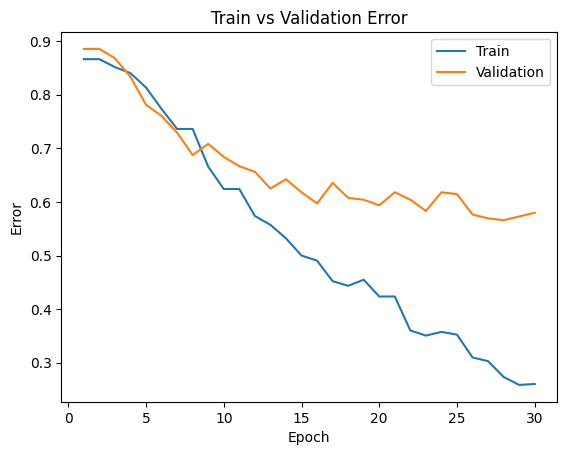

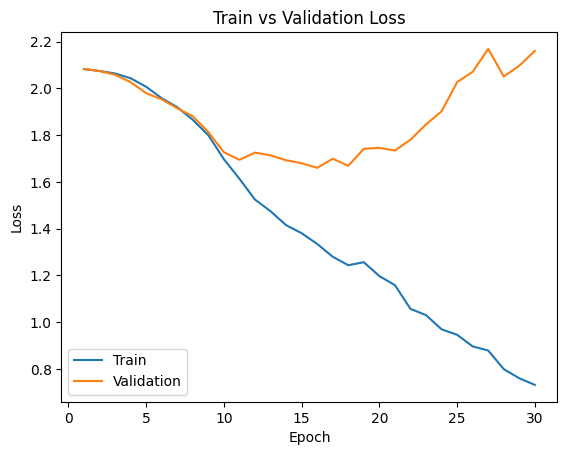

In [52]:
# TO BE COMPLETED

large_net = LargeNet()

# Train large_net with a smaller batch_size
model_path = get_model_name("large", batch_size=200, learning_rate=0.005, epoch=29)
train_net(large_net, batch_size=200, learning_rate=0.005, num_epochs=30)

# Plot the training curve
plot_training_curve(model_path)




### Part B-4(iii) [0.5pt EXPLORATORY]
Based on your result from Part(i), suggest another set of hyperparameter values to try.
Justify your choice.

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

The model seems a little overfits, and its error/loss are still far way from 0.
I'll choose a smaller batch size=150 so that the model optimizes quickly.



'''

### Part B-4(iv) [0.5pt EXPLORATORY]

Train the model with the hyperparameters you chose in part(iii), and include the training curve.

Epoch 1: Train err: 0.8698, Train loss: 2.0814 | Validation err: 0.8854, Validation loss: 2.0795
Epoch 2: Train err: 0.8594, Train loss: 2.0694 | Validation err: 0.8715, Validation loss: 2.0638
Epoch 3: Train err: 0.8385, Train loss: 2.0467 | Validation err: 0.8333, Validation loss: 2.0255
Epoch 4: Train err: 0.8160, Train loss: 1.9966 | Validation err: 0.7812, Validation loss: 1.9728
Epoch 5: Train err: 0.7491, Train loss: 1.9444 | Validation err: 0.7604, Validation loss: 1.9445
Epoch 6: Train err: 0.7135, Train loss: 1.8688 | Validation err: 0.6736, Validation loss: 1.8827
Epoch 7: Train err: 0.6589, Train loss: 1.7828 | Validation err: 0.7014, Validation loss: 1.7980
Epoch 8: Train err: 0.6458, Train loss: 1.6669 | Validation err: 0.6458, Validation loss: 1.7267
Epoch 9: Train err: 0.5877, Train loss: 1.5492 | Validation err: 0.6493, Validation loss: 1.7600
Epoch 10: Train err: 0.5764, Train loss: 1.4853 | Validation err: 0.6354, Validation loss: 1.7987
Epoch 11: Train err: 0.5677, 

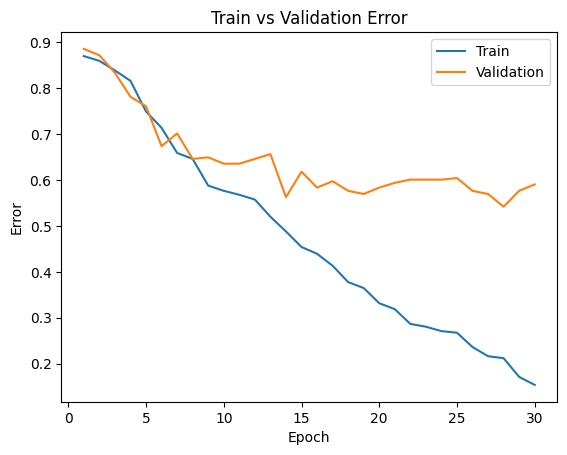

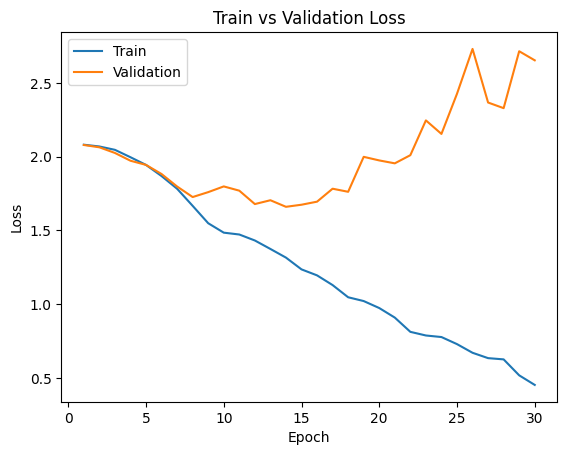

In [56]:
# TO BE COMPLETED

large_net = LargeNet()

# Train large_net with a smaller batch_size
model_path = get_model_name("large", batch_size=150, learning_rate=0.005, epoch=29)
train_net(large_net, batch_size=150, learning_rate=0.005, num_epochs=30)

# Plot the training curve
plot_training_curve(model_path)




### Part B-4(v) [1pt EXPLORATORY]


Using the models you trained in earlier subparts of Part B-4, plot a heatmap of validation errors across at least two hyperparameters (e.g., batch size vs. learning rate). Make sure to select at least two values for each hyperparameter and train the model for all combinations. The rows correspond to different batch sizes, the columns correspond to different learning rates, and the cell values are the validation errors.

Briefly explain any trends you observe and what they suggest about the effect of these hyperparameters.


 Hint: A heatmap is simply a color-coded grid where each cell’s color represents a numerical value. For example, here’s a small heatmap created with random values:

  `random_vals = np.random.rand(3, 4)`

  `sns.heatmap(random_vals, annot=True, fmt=".2f")`
  
  `plt.title("Example Heatmap with Random Values")`
  
  `plt.show()`



Epoch 1: Train err: 0.8498, Train loss: 2.0590 | Validation err: 0.7812, Validation loss: 1.9829
Epoch 2: Train err: 0.6927, Train loss: 1.8223 | Validation err: 0.7049, Validation loss: 1.8797
Epoch 3: Train err: 0.6641, Train loss: 1.6856 | Validation err: 0.6736, Validation loss: 1.7419
Epoch 4: Train err: 0.6311, Train loss: 1.6082 | Validation err: 0.6736, Validation loss: 1.6677
Epoch 5: Train err: 0.6024, Train loss: 1.5772 | Validation err: 0.6181, Validation loss: 1.6642
Epoch 6: Train err: 0.5790, Train loss: 1.5248 | Validation err: 0.5903, Validation loss: 1.6166
Epoch 7: Train err: 0.5582, Train loss: 1.4679 | Validation err: 0.6042, Validation loss: 1.6620
Epoch 8: Train err: 0.5113, Train loss: 1.3711 | Validation err: 0.5694, Validation loss: 1.5691
Epoch 9: Train err: 0.5026, Train loss: 1.3300 | Validation err: 0.5694, Validation loss: 1.6154
Epoch 10: Train err: 0.4444, Train loss: 1.2302 | Validation err: 0.5660, Validation loss: 1.5857
Epoch 11: Train err: 0.4323, 

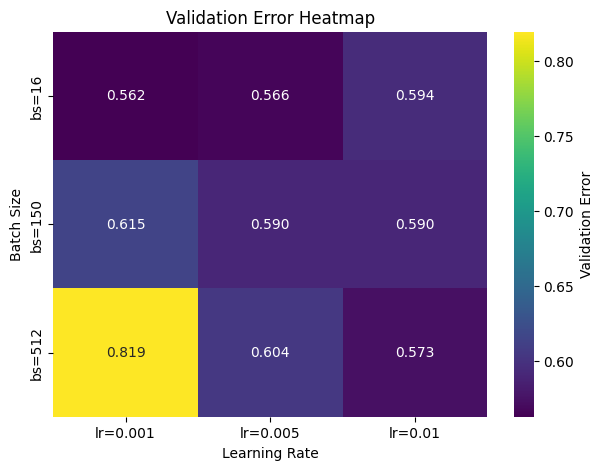

In [74]:
# TO BE COMPLETED

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the values of hyperparameters
batch_sizes = [16, 150, 512]
learning_rates = [0.001, 0.005, 0.01]

results = []

for bs in batch_sizes:
    row = []
    for lr in learning_rates:
        # Train the model
        large_net = LargeNet()
        model_path = get_model_name("large", batch_size=bs, learning_rate=lr, epoch=29)
        train_net(large_net, batch_size=bs, learning_rate=lr, num_epochs=30)

        # Load validation error history
        val_err = np.loadtxt(model_path + "_val_err.csv")

        # Record the last validation error
        row.append(val_err[-1])
    results.append(row)

# Convert results into DataFrame
df = pd.DataFrame(results,
                  index=[f"bs={b}" for b in batch_sizes],
                  columns=[f"lr={lr}" for lr in learning_rates])

# Plot heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df, annot=True, fmt=".3f", cmap="viridis", cbar_kws={"label": "Validation Error"})
plt.title("Validation Error Heatmap")
plt.xlabel("Learning Rate")
plt.ylabel("Batch Size")
plt.show()


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

The validation error increases while batch size increases. This reduces noise but
updates per epoch are fewer.

For small batch size, validation error increases while learning rate increases.
However, for large batch size, larger learning rate can reduces validation error.
The larger the batch size, the faster of the reduction. This is because the small
batch size already causes a lot of noise, and a large learning rate will make the
updates even more unstable. The model will jump around the loss surface and cannot
converge well. But for large batch size, it already has very low gradient noise,
a small learning rate will make the update too slow. In this case, larger learning
rate is more suitable.




'''

## Part B-5. Evaluating the Best Model


### Part B-5(i) [2pt MODEL]

Summarize in a table the results achieved on training and validation on all your model selections in all parts. This includes choice of `small_net` vs `large_net`, the `batch_size`, `learning_rate`,
**and the epoch number**. Hint: you can import the Pandas module to create tables.


Then upon reviewing the results choose your **best** model and load the model checkpoint. You can modify the code below to load your chosen set of weights to the model object `net`.

In [81]:
net = LargeNet()#small or large network
model_path = get_model_name(net.name, batch_size=150, learning_rate=0.005, epoch=29)
state = torch.load(model_path)
net.load_state_dict(state)

<All keys matched successfully>

In [80]:
# TO BE COMPLETED

import pandas as pd

# Collect results from your experiments
results = [
    {"Network": "large_net", "Batch Size": 16, "Learning Rate": 0.01, "Epoch": 30, "Train Error": 0.0339, "Val Error": 0.5938, "Train Loss": 0.1170, "Val Loss": 7.8517},
    {"Network": "large_net", "Batch Size": 16, "Learning Rate": 0.001, "Epoch": 30, "Train Error": 0.0061, "Val Error": 0.5625, "Train Loss": 0.0319, "Val Loss": 4.4589},
    {"Network": "large_net", "Batch Size": 16, "Learning Rate": 0.005, "Epoch": 30, "Train Error": 0.0009, "Val Error": 0.5660, "Train Loss": 0.0032, "Val Loss": 5.9222},
    {"Network": "small_net", "Batch Size": 64, "Learning Rate": 0.01, "Epoch": 30, "Train Error": 0.0009, "Val Error": 0.5312, "Train Loss": 0.0618, "Val Loss": 3.4273},
    {"Network": "large_net", "Batch Size": 64, "Learning Rate": 0.01, "Epoch": 30, "Train Error": 0.0017, "Val Error": 0.5799, "Train Loss": 0.0109, "Val Loss": 6.2084},
    {"Network": "large_net", "Batch Size": 64, "Learning Rate": 0.001, "Epoch": 30, "Train Error": 0.3247, "Val Error": 0.6042, "Train Loss": 0.9259, "Val Loss": 2.0753},
    {"Network": "large_net", "Batch Size": 64, "Learning Rate": 0.1, "Epoch": 30, "Train Error": 0.8776, "Val Error": 0.8854, "Train Loss": 2.0810, "Val Loss": 2.0820},
    {"Network": "large_net", "Batch Size": 150, "Learning Rate": 0.001, "Epoch": 30, "Train Error": 0.5295, "Val Error": 0.6146, "Train Loss": 1.4687, "Val Loss": 1.7074},
    {"Network": "large_net", "Batch Size": 150, "Learning Rate": 0.005, "Epoch": 30, "Train Error": 0.1536, "Val Error": 0.5903, "Train Loss": 0.4534, "Val Loss": 2.6533},
    {"Network": "large_net", "Batch Size": 150, "Learning Rate": 0.01, "Epoch": 30, "Train Error": 0.0651, "Val Error": 0.5903, "Train Loss": 0.2170, "Val Loss": 3.2370},
    {"Network": "large_net", "Batch Size": 200, "Learning Rate": 0.005, "Epoch": 30, "Train Error": 0.2604, "Val Error": 0.5799, "Train Loss": 0.7317, "Val Loss": 2.1605},
    {"Network": "large_net", "Batch Size": 512, "Learning Rate": 0.001, "Epoch": 30, "Train Error": 0.8281, "Val Error": 0.8194, "Train Loss": 1.9946, "Val Loss": 1.9952},
    {"Network": "large_net", "Batch Size": 512, "Learning Rate": 0.005, "Epoch": 30, "Train Error": 0.4800, "Val Error": 0.6042, "Train Loss": 1.3529, "Val Loss": 1.7779},
    {"Network": "large_net", "Batch Size": 512, "Learning Rate": 0.01, "Epoch": 30, "Train Error": 0.3637, "Val Error": 0.5729, "Train Loss": 1.0190, "Val Loss": 1.8360}
    ]

df = pd.DataFrame(results)
display(df)





,Network,Batch Size,Learning Rate,Epoch,Train Error,Val Error,Train Loss,Val Loss
0,large_net,16,0.010,30,0.0339,0.5938,0.1170,7.8517
1,large_net,16,0.001,30,0.0061,0.5625,0.0319,4.4589
2,large_net,16,0.005,30,0.0009,0.5660,0.0032,5.9222
3,small_net,64,0.010,30,0.0009,0.5312,0.0618,3.4273
4,large_net,64,0.010,30,0.0017,0.5799,0.0109,6.2084
5,large_net,64,0.001,30,0.3247,0.6042,0.9259,2.0753
6,large_net,64,0.100,30,0.8776,0.8854,2.0810,2.0820
7,large_net,150,0.001,30,0.5295,0.6146,1.4687,1.7074
8,large_net,150,0.005,30,0.1536,0.5903,0.4534,2.6533
9,large_net,150,0.010,30,0.0651,0.5903,0.2170,3.2370


### Part B-5(ii) [4pt DISCUSSION]

Justify your choice of model from Part (i).

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

I compared models based on their validation errors and gap between validation
and training errors. This checks model validation and overfitting at the same time.

The best model is a large net with batch size=150, learning rate=0.005, and epoch
number=30. Because it has a relatively low validation error and small gap.

Other models, for example, small net with batch size = 64 and learning rate=0.01,
has the smallest validation error but the largest gap, which indicates huge overfitting.

'''

### Part B-5(iii) [2pt RESULT]

Using the helper code in Part 0, any code from lecture notes, or any code that you write:

- Compute and report the **test classification error** for your chosen model.


- For 5 test images, print the true label of the image, and report the top-3 predicted classes with their probabilities.
(“Top-3” means the three classes with the highest predicted probabilities, showing the model’s first, second, and third best guesses.)
Comment on whether the probabilities reflect the model’s confidence (e.g., does it give a very high probability to a wrong class, or spread probabilities when uncertain?).


In [87]:
# If you use the `evaluate` function provided in part 0, you will need to
# set batch_size > 1
train_loader, val_loader, test_loader, classes = get_data_loader(
    data_dir=data_dir,
    batch_size=64)

In [88]:
# TO BE COMPLETED

net.eval()
criterion = torch.nn.CrossEntropyLoss()
test_err, test_loss = evaluate(net, test_loader, criterion)

print(f"Test error: {test_err:.4f} | Test loss: {test_loss:.4f}")




Test error: 0.2062 | Test loss: 0.9030


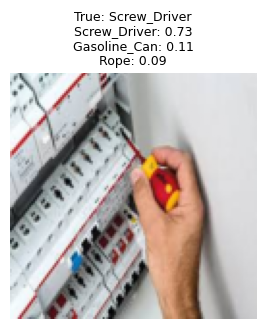

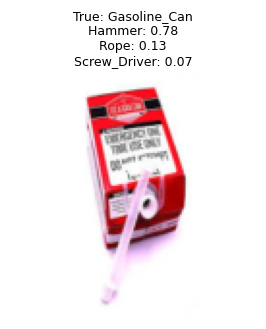

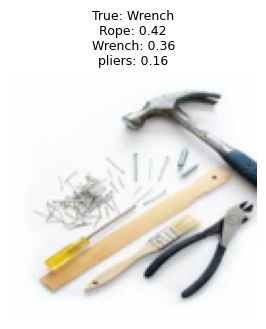

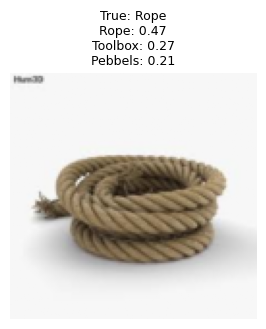

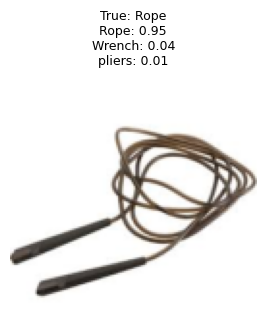

In [84]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

def show_tensor_img(img):

    img = img.clone().cpu()
    img = img * 0.5 + 0.5           # [-1,1] -> [0,1]
    img = img.permute(1, 2, 0)      # CHW -> HWC
    plt.imshow(img.numpy())
    plt.axis("off")

shown = 0
net.eval()
with torch.no_grad():
    for images, labels in test_loader:
        logits = net(images)                 # evaluate() keeps everything on CPU
        probs  = F.softmax(logits, dim=1)
        top_p, top_i = probs.topk(3, dim=1)  # top-3 per image

        for j in range(min(len(images), 5 - shown)):
            plt.figure(figsize=(3.2, 3.2))
            show_tensor_img(images[j])

            triples = [(classes[top_i[j,k].item()], float(top_p[j,k]))
                       for k in range(3)]
            title = (f"True: {classes[labels[j].item()]}\n"
                     + "\n".join([f"{c}: {p:.2f}" for c,p in triples]))
            plt.title(title, fontsize=9)
            plt.show()

            shown += 1
            if shown >= 5:
                break
        if shown >= 5:
            break


In [ ]:
'''
Comment on whether the probabilities reflect the model’s confidence (e.g., does
it give a very high probability to a wrong class, or spread probabilities when uncertain?)

Probabilities reflect the model's confidence.

The first, fourth, and fifth image shows the model gives high probability to the correct class.
The second image shows that the model gives a high probability to the wrong class,
and the thrid image shows a spread probabilities when uncertain (with second pred/prob is correct).


'''

### Part B-5(iv) [3pt DISCUSSION]

How does the test classification error compare with the **validation error**?
Explain why you would expect the test error to be *higher* than the validation error.

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW


The model is: Large net, batch size=150, learning rate=0.005, epoch=30
Validation error = 0.5903
Test error = 0.2188

Test error is smaller than validation error. In this case, the lower test error
may be due to randomness in dataset splitting (the test set might be slightly
easier), or because the model generalized better on the test samples. The key
point is that the test error is still within the same range, so the model shows
good generalization.


'''

### Part B-5(v) [3pt DISCUSSION]
Why did we only use the test data set at the very end?
Why is it important that we use the test data as little as possible?

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW


We use the test data at the end to evaluate model performance. In this case we
want it to be unseen before testing. In the training & prediction process we
want training set to train the model, validation set to select hyperparameters,
and test set to finally test the model.

If we use the test set too ealy or too often, we would indirectly tune our
model to perform well on the test set, which causes data leakage and overestimates
the model’s real-world performance.

'''

### Part B-5(vi) [3pt RESULT]
Preprocess the images from the secret test set provided below and classify these images into the 8 class labels from the mechanical tools dataset using your chosen model. Report the model predictions by your chosen model on this test dataset as a csv file called 'labels_part5.csv', containing the name of the images and their corresponsing predicted labels for all the images in the folder.

In [89]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=a73176a15f7f864b80cce4ddd83445b57827ea6a7e4ae3b8bb1e693893700a69
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [109]:
import wget
#myfile = wget.download('https://github.com/Sabaae/Dataset/blob/main/secret_test.zip')
myfile = wget.download('https://github.com/Sabaae/Dataset/raw/main/secret_test.zip')

In [110]:
# TO BE COMPLETED

_ = !unzip "/content/secret_test.zip" -d "/content/secret_test/"

# Load the Dataset
data_dir = "/content/secret_test/secret_test"  # Path to the dataset directory

In [113]:
import csv
from PIL import Image

img_list = os.listdir(data_dir)

predictions = []

transform = transforms.Compose([
      transforms.Resize((128, 128)),  # Resize to 128x128
      transforms.ToTensor(),         # Convert to Tensor
      transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

predictions = []

# Loop the IMG
for img_name in os.listdir(data_dir):
    img_path = os.path.join(data_dir, img_name)
    image_pil = Image.open(img_path).convert('RGB')
    img_tensor = transform(image_pil).unsqueeze(0)
    output = net(img_tensor)
    _, pred_idx = torch.max(output, dim=1)
    predicted_label = classes[pred_idx.item()]
    predictions.append((img_name, predicted_label))

# Write in CSV
csv_filename = 'labels_part5.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['image_name', 'predicted_label'])
    writer.writerows(predictions)

print(f"file saved: {csv_filename}")

file saved: labels_part5.csv。


## Part B-6. Fully-Connected Linear ANN vs CNN [4pt RESULT]

Test out a 3-layer linear fully-connected ANN architecture (see simpleANN below). You should explore different hyperparameter settings to determine how well you can do on the validation dataset. Once satisified with the performance, you may test it out on the test data.


Similar to what you did in the previous part, report the model predictions by your best ANN architecture on the secret test dataset as a csv file called 'labels_part6.csv', containing the names of the images and their corresopnding predicted labels for all the images in the folder.


How does the your best CNN model compare with an 2-layer linear ANN model (no convolutional layers) on classifying mechanical tools images?


In [114]:
class simpleANN(nn.Module):
    def __init__(self):
        super(simpleANN, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(128*128*3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 8)

    def forward(self, x):
        x = x.view(-1, 128*128*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Epoch 1: Train err: 0.8359, Train loss: 2.0407 | Validation err: 0.7917, Validation loss: 1.9769
Epoch 2: Train err: 0.7535, Train loss: 1.8911 | Validation err: 0.6979, Validation loss: 1.9003
Epoch 3: Train err: 0.6276, Train loss: 1.7232 | Validation err: 0.6979, Validation loss: 1.7739
Epoch 4: Train err: 0.6354, Train loss: 1.6389 | Validation err: 0.6493, Validation loss: 1.6803
Epoch 5: Train err: 0.6207, Train loss: 1.5576 | Validation err: 0.6562, Validation loss: 1.6945
Epoch 6: Train err: 0.6016, Train loss: 1.5297 | Validation err: 0.6424, Validation loss: 1.7117
Epoch 7: Train err: 0.5477, Train loss: 1.5152 | Validation err: 0.6319, Validation loss: 1.7309
Epoch 8: Train err: 0.5634, Train loss: 1.4844 | Validation err: 0.6632, Validation loss: 1.7878
Epoch 9: Train err: 0.5451, Train loss: 1.4611 | Validation err: 0.6562, Validation loss: 1.7346
Epoch 10: Train err: 0.5425, Train loss: 1.4006 | Validation err: 0.6250, Validation loss: 1.6055
Epoch 11: Train err: 0.4983, 

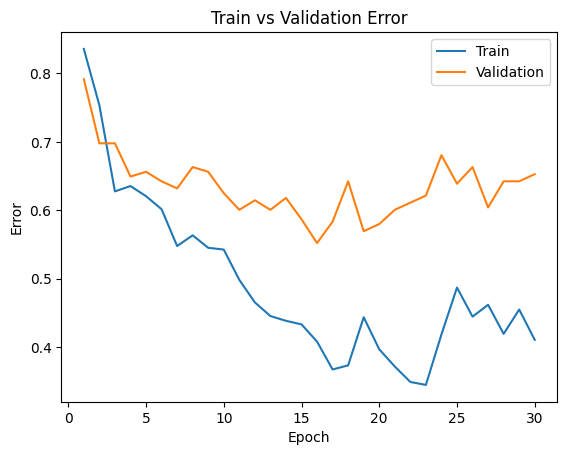

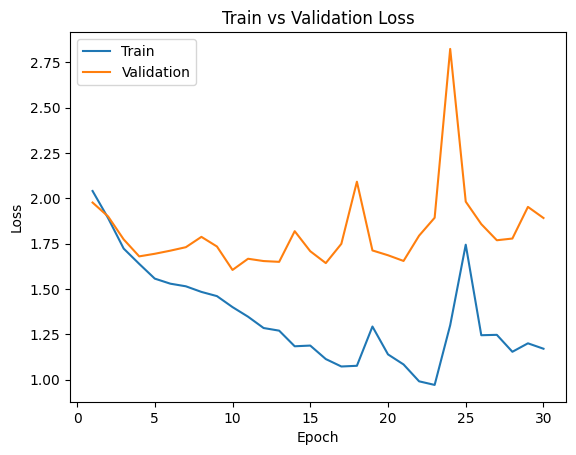

In [115]:
# TO BE COMPLETED

# try first values of hyperparameter
simple_ann = simpleANN()
train_net(simple_ann, batch_size=500, learning_rate=0.01, num_epochs=30)
simple_ann_path = get_model_name(simple_ann.name, batch_size=500, learning_rate=0.01, epoch=29)
plot_training_curve(simple_ann_path)




Epoch 1: Train err: 0.8628, Train loss: 2.0603 | Validation err: 0.8819, Validation loss: 2.0252
Epoch 2: Train err: 0.8559, Train loss: 1.9977 | Validation err: 0.7951, Validation loss: 1.9706
Epoch 3: Train err: 0.7717, Train loss: 1.9101 | Validation err: 0.6806, Validation loss: 1.9063
Epoch 4: Train err: 0.6380, Train loss: 1.8398 | Validation err: 0.6806, Validation loss: 1.8358
Epoch 5: Train err: 0.6380, Train loss: 1.7538 | Validation err: 0.6701, Validation loss: 1.7715
Epoch 6: Train err: 0.5998, Train loss: 1.6428 | Validation err: 0.6215, Validation loss: 1.7299
Epoch 7: Train err: 0.5373, Train loss: 1.6232 | Validation err: 0.6389, Validation loss: 1.7152
Epoch 8: Train err: 0.5538, Train loss: 1.5855 | Validation err: 0.6632, Validation loss: 1.6988
Epoch 9: Train err: 0.5903, Train loss: 1.6202 | Validation err: 0.6493, Validation loss: 1.6930
Epoch 10: Train err: 0.5616, Train loss: 1.5449 | Validation err: 0.6250, Validation loss: 1.6859
Epoch 11: Train err: 0.5521, 

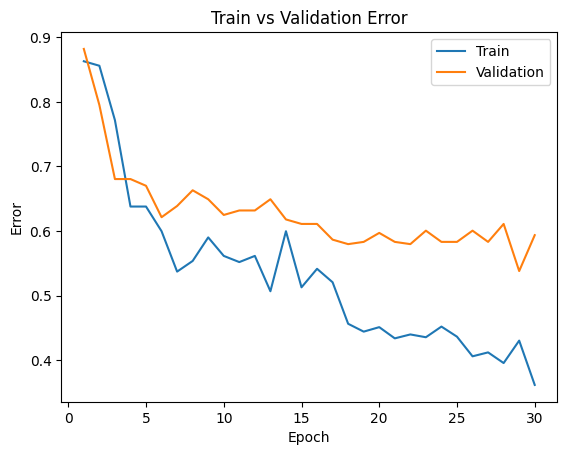

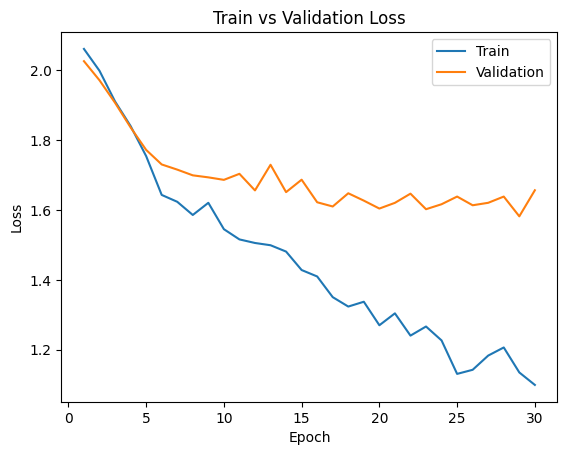

In [120]:
# because curves are very unstable (although gaps are small), I increase batch size to 1000 and shrink learning rate
simple_ann = simpleANN()
train_net(simple_ann, batch_size=1000, learning_rate=0.005, num_epochs=30)
simple_ann_path = get_model_name(simple_ann.name, batch_size=1000, learning_rate=0.005, epoch=29)
plot_training_curve(simple_ann_path)


In [124]:
# Simple ANN val error & loss
val_err, val_loss = evaluate(simple_ann, val_loader, criterion)
print(f"Simple ANN - Validation Error: {val_err:.4f} | Validation Loss: {val_loss:.4f}")

# simple ANN test error & loss
test_err, test_loss = evaluate(simple_ann, test_loader, criterion)
print(f"Simple ANN - Test Error: {test_err:.4f} | Test Loss: {test_loss:.4f}")

# CNN val error & loss
val_err, val_loss = evaluate(net, val_loader, criterion)
print(f"CNN - Validation Error: {val_err:.4f} | Validation Loss: {val_loss:.4f}")

# CNN test error & loss
test_err, test_loss = evaluate(net, test_loader, criterion)
print(f"CNN - Test Error: {test_err:.4f}  | Test Loss: {test_loss:.4f}")

Simple ANN - Validation Error: 0.4514 | Validation Loss: 1.3442
Simple ANN - Test Error: 0.3750 | Test Loss: 1.1381
CNN - Validation Error: 0.2535 | Validation Loss: 1.2347
CNN - Test Error: 0.2062  | Test Loss: 0.9030


In [125]:
net1 = simple_ann
model_path1 = get_model_name(net1.name, batch_size=1000, learning_rate=0.005, epoch=29)
state1 = torch.load(model_path1)
net1.load_state_dict(state1)
net1.eval()


simpleANN(
  (fc1): Linear(in_features=49152, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=8, bias=True)
)

In [126]:
img_list = os.listdir(data_dir)

predictions = []

transform = transforms.Compose([
      transforms.Resize((128, 128)),  # Resize to 128x128
      transforms.ToTensor(),         # Convert to Tensor
      transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

predictions = []

# Loop the IMG
for img_name in os.listdir(data_dir):
    img_path = os.path.join(data_dir, img_name)
    image_pil = Image.open(img_path).convert('RGB')
    img_tensor = transform(image_pil).unsqueeze(0)
    output = net1(img_tensor)
    _, pred_idx = torch.max(output, dim=1)
    predicted_label = classes[pred_idx.item()]
    predictions.append((img_name, predicted_label))

# Write in CSV
csv_filename = 'labels_part6.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['image_name', 'predicted_label'])
    writer.writerows(predictions)

print(f"file saved: {csv_filename}")

file saved: labels_part6.csv


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

CNN is better than Simple ANN.

It has lower validation and test error than ANN (0.2535 & 0.2062 compared to 0.4514 & 0.3750),
and the gaps between validation and test error are also smaller for CNN. This is because CNN leverages
spatial structure in images (local receptive fields, weight sharing, translation
invariance). The Simple ANN treats images as flattened vectors, ignoring spatial
correlations (e.g., nearby pixels forming edges/shapes). Besides, For image tasks,
CNNs extract hierarchical features (edges → textures → objects), which the ANN cannot.


'''

# PART C (Optional) - Bonus Challenge!

This is an optional exercise for those that finish the assignment early and would like to perform a deeper exploration of the assignment.

In part A we constructed and trained a 2-layer neural network from scratch. In Part B we saw how PyTorch can be used to simplify the construction of neural networks by taking care of all the complexity related to gradient calculations, training on GPUs, and structuring your code.

For this bonus challenge we will propose additional task that will have you work towards completing the pipeline and deploying the models online, while exploring ways to improve these models along the way.

Tasks:

1. Modify your code to classify images that are not "Rope" or "Hammer" into the category "other".
2. Preprocess images from the internet to be able to classify any images into mechanical tools lables such as gasoline_can, hammer, etc. (i.e., resize, aspect ratio, etc.). Evaluate your best model's performance on images loaded from the internet.
3. Deploy your best model onto huggingface spaces (or other web hosting services) to classify images into the different mechanical tools classes.

Bonus marks will be provided based on the number of tasks completed and how well they are completed. Summarize below your results and anything intersting you learned from the steps that you completed. Bonus marks cannot be accumulated beyond a maximum assignment grade.

In [ ]:
# TO BE COMPLETED






In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [128]:
%%shell
jupyter nbconvert --to html /content/A1_ShumanZhao.ipynb

[NbConvertApp] Converting notebook /content/A1_ShumanZhao.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 28 image(s).
[NbConvertApp] Writing 2807615 bytes to /content/A1_ShumanZhao.html


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus

# Assignment Grading Rubric
The grading of the assignment will be based on the following categories:

(1) **10 Pt - EXPLORATORY QUESTIONS** These are basic questions that in most cases can be answered without requiring a fully working and trained neural network model. For example, data loading, processing and visualization, summary statistics, data exploration, model and training setup, etc.

(2) **10 Pt - MODEL** Student has successfully implemented all the required neural network models and has demonstrated successful training of the model without any errors.

(3) **10 Pt - RESULT** Students are evaluated based on the results achieved in comparison to the expected results of the assignment.

(4) **10 Pt - DISCUSSION QUESTIONS** Student demonstrated understanding beyond the basic exploratory questions, can answer some of the more challenging questions, and provide arguments for their model selection decisions.

(5) **10 Pt - COMMUNICATION** Student has provided a quality submission that is easy to read without too many unnecessary output statements that distract the reading of the document. The code has been well commented and all the answers are communicated clearly and concisely.

(6) **5 Pt - BONUS** Student has completed the assignment and has taken on the challenging bonus tasks listed in PART C. The student has demonstrated a good understanding of all aspects of the assignment and has exceeded expectations for the assignment.



**TOTAL GRADE = _____ of 50 Pts**